### <center> Telecom Churn Prediction using Multivariate Logistic Regression </center>
We will use 21 variables related to customer behaviour (such as the monthly bill, internet usage etc.) to predict whether a particular customer will switch to another telecom provider or not (i.e. churn or not).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
import sklearn

### Import Datasets

In [2]:
# importing datasets 

churn_df = pd.read_csv("churn_data.csv")

churn_df.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_df = pd.read_csv("customer_data.csv")

customer_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [4]:
internet_df = pd.read_csv("internet_data.csv")

internet_df.head()

,customerID,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,No,Fiber optic,No,No,No,No,No,No


In [5]:
# Let's combine the datasets into one master dataset

master = pd.merge(left=churn_df, right=customer_df, how="inner", on="customerID")

master = pd.merge(left=master, right=internet_df, how="inner", on="customerID")

# to display all the columns at once 

pd.set_option('display.max_columns', 25)

master.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No


### Data Preparation

In [6]:
# dummy encoding for Yes/No variables

def binary_encod(x):
    return x.map({"Yes":1, "No":0})

binary_vars = ["PhoneService", "PaperlessBilling", "Churn", "Partner", "Dependents"]

master[binary_vars] = master[binary_vars].apply(binary_encod)

In [7]:
master.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,1,One year,0,Mailed check,56.95,1889.5,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [8]:
# dummy encoding for other categorical variables

cat_vars = ["Contract", "PaymentMethod", "gender", "InternetService"]

dm_1 = pd.get_dummies(master[cat_vars], drop_first=True)

master = pd.concat([master, dm_1], axis=1)

In [9]:
# dropping the original variables 

master.drop(columns=cat_vars, inplace=True)

master.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0


In [10]:
pd.set_option('display.max_columns', 100)

In [11]:
# converting remaining columns to dummy variables but here we choose which dummy variable to drop manually
# for each corresponding variable

dm_2 = pd.get_dummies(master.MultipleLines, prefix="MultipleLines")
dm_2.drop(columns="MultipleLines_No phone service", inplace=True)
master = pd.concat([master, dm_2], axis=1)

In [12]:
dm_2 = pd.get_dummies(master.OnlineSecurity, prefix="OnlineSecurity")
dm_2.drop(columns="OnlineSecurity_No internet service", inplace=True)
master = pd.concat([master, dm_2], axis=1)

dm_2 = pd.get_dummies(master.OnlineBackup, prefix="OnlineBackup")
dm_2.drop(columns="OnlineBackup_No internet service", inplace=True)
master = pd.concat([master,dm_2], axis=1)

dm_2 = pd.get_dummies(master.DeviceProtection, prefix="DeviceProtection")
dm_2.drop(columns="DeviceProtection_No internet service", inplace=True)
master = pd.concat([master,dm_2], axis=1)

dm_2 = pd.get_dummies(master.TechSupport, prefix="TechSupport")
dm_2.drop(columns="TechSupport_No internet service", inplace=True)
master = pd.concat([master,dm_2], axis=1)

dm_2 = pd.get_dummies(master.StreamingTV, prefix="StreamingTV")
dm_2.drop(columns="StreamingTV_No internet service", inplace=True)
master = pd.concat([master,dm_2], axis=1)

dm_2 = pd.get_dummies(master.StreamingMovies, prefix="StreamingMovies")
dm_2.drop(columns="StreamingMovies_No internet service", inplace=True)
master = pd.concat([master,dm_2], axis=1)

master.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,No phone service,No,Yes,No,No,No,No,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,No,Yes,No,Yes,No,No,No,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,No,Yes,Yes,No,No,No,No,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,No phone service,Yes,No,Yes,Yes,No,No,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,No,No,No,No,No,No,No,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [13]:
# dropping the original variables 

drop_vars = ["MultipleLines", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
             "StreamingTV", "StreamingMovies"]

master.drop(columns=drop_vars, inplace=True)

master.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.5,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [14]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   object 
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [15]:
master.TotalCharges.value_counts().sort_index()

          11
100.2      1
100.25     1
100.35     1
100.4      1
          ..
997.75     1
998.1      1
999.45     1
999.8      1
999.9      1
Name: TotalCharges, Length: 6531, dtype: int64

'TotalCharges' is a numerical column having object type, so let's change that to numerical

It is numerical because of an empty value which is categorized as a string, I will replace the empty value with 0

In [16]:
master.TotalCharges = master.TotalCharges.apply(lambda x : "0" if x == " " else x)

In [17]:
def change_type(x):
    return float(x)

master.TotalCharges = master.TotalCharges.apply(change_type)

In [18]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customerID                             7043 non-null   object 
 1   tenure                                 7043 non-null   int64  
 2   PhoneService                           7043 non-null   int64  
 3   PaperlessBilling                       7043 non-null   int64  
 4   MonthlyCharges                         7043 non-null   float64
 5   TotalCharges                           7043 non-null   float64
 6   Churn                                  7043 non-null   int64  
 7   SeniorCitizen                          7043 non-null   int64  
 8   Partner                                7043 non-null   int64  
 9   Dependents                             7043 non-null   int64  
 10  Contract_One year                      7043 non-null   uint8  
 11  Cont

In [19]:
master.head()

,customerID,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,7590-VHVEG,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,5575-GNVDE,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,3668-QPYBK,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,7795-CFOCW,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,9237-HQITU,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


In [20]:
master.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

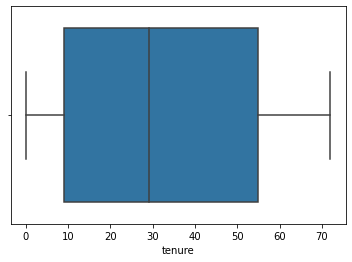

In [21]:
# let's check for outliers 

sns.boxplot(master.tenure)
plt.show()

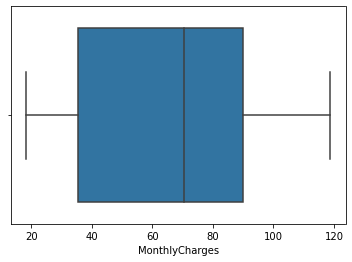

In [22]:
sns.boxplot(master.MonthlyCharges)
plt.show()

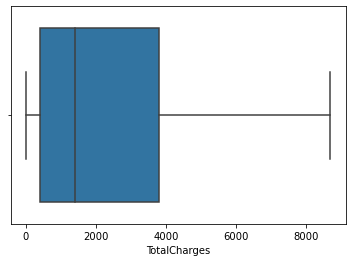

In [23]:
sns.boxplot(master.TotalCharges)
plt.show()

The data has no outliers and no missing values, let's proceed

In [24]:
round(master[master.Churn == 1].shape[0] / master.shape[0] * 100, 2)

26.54

Dataset have 26.54% churn customers. Class imbalance is not too much so now let's split the data into train and test

#### Train Test Split

In [25]:
X = master.drop(columns=["customerID", "Churn"])
y = master.Churn

In [26]:
X.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1,34,1,0,56.95,1889.50,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0
2,2,1,1,53.85,108.15,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
3,45,0,0,42.30,1840.75,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,1,0
4,2,1,1,70.70,151.65,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0


Now, we will first split the data into train and test, then we'll standardize the values

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=123)

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4930, 30)
(4930,)
(2113, 30)
(2113,)


#### Standardization

In [29]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

num_vars = ["tenure", "MonthlyCharges", "TotalCharges"]

# using fit transform on train data

X_train[num_vars] = sc.fit_transform(X_train[num_vars])

X_train.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
1479,0.459838,0,1,-0.525944,-0.012959,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,1,0,1
2377,0.581957,1,1,-0.317349,0.159289,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1,0,1,0
6613,-1.209111,1,0,-1.482142,-0.987810,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6468,-0.761344,1,0,-0.674463,-0.731861,0,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0
2668,-1.290523,1,0,-1.503836,-1.007025,0,0,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
# using transform on test data

X_test[num_vars] = sc.transform(X_test[num_vars])

X_test.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,InternetService_Fiber optic,InternetService_No,MultipleLines_No,MultipleLines_Yes,OnlineSecurity_No,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_Yes,TechSupport_No,TechSupport_Yes,StreamingTV_No,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes
941,-0.802050,0,0,-1.156734,-0.846553,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0
1404,0.093484,1,0,-1.385354,-0.662860,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5515,-0.598520,1,0,-1.517186,-0.878851,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3684,0.419132,1,1,0.351823,0.383914,0,0,0,0,0,1,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0
7017,0.744781,1,0,-1.473798,-0.563841,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Looking at Correlations

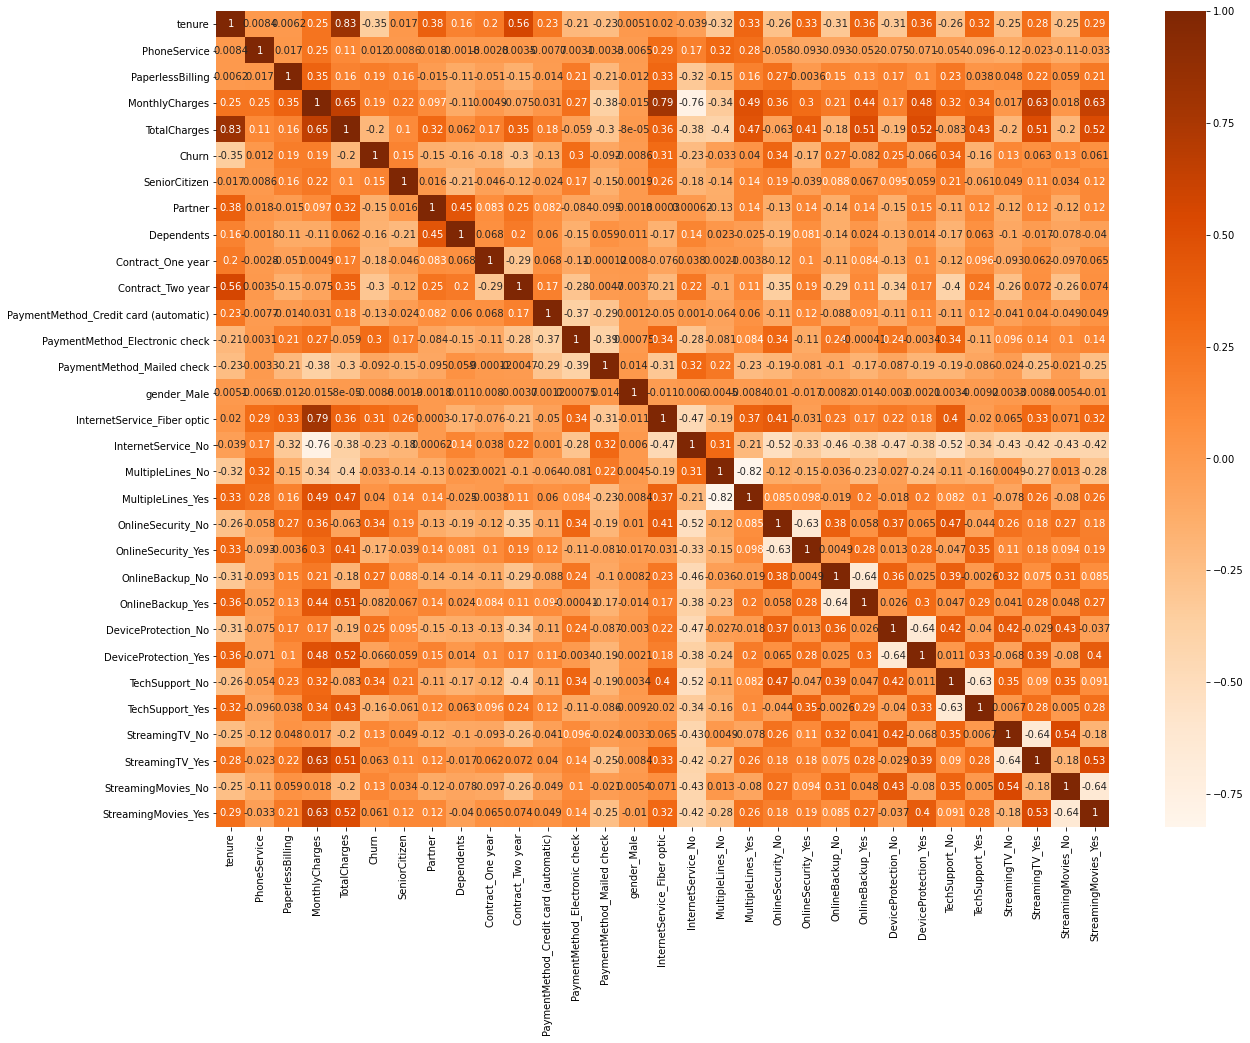

In [31]:
plt.figure(figsize=(20, 15))
sns.heatmap(master.corr(), annot=True, cmap="Oranges")
plt.show()

The 'Yes' and 'No' dummy variables of many columns have high negative correlations which is given in white shade in the heatmap. Let's remove 'No's of all the variables before building the model because RFE may remove 'Yes's but we don't want that as 'Yes' is more interpretable and intuitive. 

In [32]:
no_vars = ["MultipleLines_No", "OnlineSecurity_No", "OnlineBackup_No", "DeviceProtection_No", "TechSupport_No",
           "StreamingTV_No", "StreamingMovies_No"]

X_train.drop(columns=no_vars, inplace=True)
X_test.drop(columns=no_vars, inplace=True)

### Model Building

In [33]:
X_train_sm = sm.add_constant(X_train)

model = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

model = model.fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4906
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2010.9
Date:                Fri, 18 Feb 2022   Deviance:                       4021.9
Time:                        10:58:23   Pearson chi2:                 5.84e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.8202      1.556     -1.812      0.070      -5.870       0.229
tenure                                   -1.4717      0.186     -7.914      0.000      -1.836      -1.107
PhoneService                              0.2007      0.790      0.254      0.800      -1.348       1.750
PaperlessBilling                          0.2872      0.090      3.200      0.001       0.111       0.463
MonthlyCharges                           -1.2945      1.159     -1.117      0.264      -3.566       0.977
TotalCharges                              0.6994      0.193      3.616      0.000       0.320       1.079
SeniorCitizen                             0.2461      0.101      2.431      0.015       0.048       0.444
Partner                                  -0.0322      0.094     -0.344      0.731      -0.216       0.151
Dependents                               -0.1677      0.108     -1.549      0.121      -0.380       0.044
Contract_One year                        -0.6095      0.130     -4.676      0.000      -0.865      -0.354
Contract_Two year                        -1.2300      0.208     -5.916      0.000      -1.638      -0.823
PaymentMethod_Credit card (automatic)    -0.1244      0.139     -0.898      0.369      -0.396       0.147
PaymentMethod_Electronic check            0.3000      0.115      2.620      0.009       0.076       0.525
PaymentMethod_Mailed check               -0.0138      0.138     -0.100      0.920      -0.285       0.257
gender_Male                               0.0183      0.078      0.234      0.815      -0.135       0.171
InternetService_Fiber optic               1.8630      0.972      1.916      0.055      -0.043       3.769
InternetService_No                       -1.8952      0.983     -1.928      0.054      -3.822       0.031
MultipleLines_Yes                         0.4632      0.216      2.142      0.032       0.039       0.887
OnlineSecurity_Yes                       -0.2922      0.219     -1.337      0.181      -0.721       0.136
OnlineBackup_Yes                          0.0128      0.213      0.060      0.952      -0.404       0.430
DeviceProtection_Yes                      0.2170      0.216      1.007      0.314      -0.206       0.640
TechSupport_Yes                          -0.1273      0.218     -0.584      0.559      -0.555       0.300
StreamingTV_Yes                           0.6612      0.398      1.661      0.097      -0.119       1.441
StreamingMovies_Yes                       0.6246      0.397      1.573      0.116      -0.154       1.403
=========================================================================================================
"""

#### Feature Selection using RFE

Let's select top 15 features first and then we'll do manual feature selection if needed

In [34]:
# we use sklearn to do RFE

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

from sklearn.feature_selection import RFE

rfe = RFE(logreg, 15)

rfe = rfe.fit(X_train, y_train)

In [35]:
rfe.support_

array([ True,  True,  True, False,  True,  True, False, False,  True,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True, False])

In [36]:
cols = X_train.columns[rfe.support_]

In [37]:
# the columns that were eliminated are 

X_train.columns[~rfe.support_]

Index(['MonthlyCharges', 'Partner', 'Dependents',
       'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Mailed check',
       'gender_Male', 'DeviceProtection_Yes', 'StreamingMovies_Yes'],
      dtype='object')

In [38]:
# let's use statsmodels to make the model again

X_train_sm = sm.add_constant(X_train[cols])

model2 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

model2 = model2.fit()

model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4914
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2015.8
Date:                Fri, 18 Feb 2022   Deviance:                       4031.6
Time:                        10:58:26   Pearson chi2:                 6.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.1108      0.175     -6.352      0.000      -1.453      -0.768
tenure                            -1.5527      0.181     -8.592      0.000      -1.907      -1.199
PhoneService                      -0.6985      0.161     -4.339      0.000      -1.014      -0.383
PaperlessBilling                   0.2977      0.089      3.338      0.001       0.123       0.473
TotalCharges                       0.7969      0.186      4.285      0.000       0.432       1.161
SeniorCitizen                      0.2680      0.099      2.697      0.007       0.073       0.463
Contract_One year                 -0.6163      0.129     -4.761      0.000      -0.870      -0.363
Contract_Two year                 -1.2435      0.207     -6.004      0.000      -1.649      -0.838
PaymentMethod_Electronic check     0.3563      0.083      4.271      0.000       0.193       0.520
InternetService_Fiber optic        0.7861      0.117      6.715      0.000       0.557       1.016
InternetService_No                -0.8383      0.166     -5.057      0.000      -1.163      -0.513
MultipleLines_Yes                  0.2478      0.095      2.604      0.009       0.061       0.434
OnlineSecurity_Yes                -0.5214      0.102     -5.102      0.000      -0.722      -0.321
OnlineBackup_Yes                  -0.2133      0.093     -2.284      0.022      -0.396      -0.030
TechSupport_Yes                   -0.3422      0.102     -3.346      0.001      -0.543      -0.142
StreamingTV_Yes                    0.2684      0.095      2.832      0.005       0.083       0.454
==================================================================================================
"""

p-values for all the variables is good enough, let's check their VIF scores

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def get_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif["VIF"] = round(vif["VIF"], 2)
    vif = vif.sort_values(by="VIF", ascending=False)
    return vif

get_vif(X_train_sm)

,Features,VIF
0,const,22.66
4,TotalCharges,9.51
1,tenure,6.90
7,Contract_Two year,2.61
10,InternetService_No,2.61
9,InternetService_Fiber optic,2.35
6,Contract_One year,1.61
15,StreamingTV_Yes,1.60
14,TechSupport_Yes,1.51
12,OnlineSecurity_Yes,1.48


'TotalCharges' has very high VIF value so let's remove it

In [40]:
X_train.columns[rfe.support_]

Index(['tenure', 'PhoneService', 'PaperlessBilling', 'TotalCharges',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingTV_Yes'],
      dtype='object')

In [41]:
# removing 'TotalCharges' from rfe.support_

cols = ['tenure', 'PhoneService', 'PaperlessBilling',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'OnlineBackup_Yes', 'TechSupport_Yes', 'StreamingTV_Yes']

In [42]:
X_train_sm = sm.add_constant(X_train[cols])

model3 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

model3 = model3.fit()

model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4915
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2025.5
Date:                Fri, 18 Feb 2022   Deviance:                       4051.0
Time:                        10:58:26   Pearson chi2:                 5.06e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3314      0.164     -8.118      0.000      -1.653      -1.010
tenure                            -0.8520      0.067    -12.790      0.000      -0.983      -0.721
PhoneService                      -0.5454      0.153     -3.557      0.000      -0.846      -0.245
PaperlessBilling                   0.2958      0.089      3.326      0.001       0.121       0.470
SeniorCitizen                      0.2805      0.100      2.810      0.005       0.085       0.476
Contract_One year                 -0.6045      0.128     -4.716      0.000      -0.856      -0.353
Contract_Two year                 -1.2180      0.205     -5.942      0.000      -1.620      -0.816
PaymentMethod_Electronic check     0.3467      0.084      4.148      0.000       0.183       0.511
InternetService_Fiber optic        0.9644      0.109      8.868      0.000       0.751       1.178
InternetService_No                -0.8935      0.165     -5.418      0.000      -1.217      -0.570
MultipleLines_Yes                  0.3063      0.094      3.264      0.001       0.122       0.490
OnlineSecurity_Yes                -0.4723      0.102     -4.648      0.000      -0.672      -0.273
OnlineBackup_Yes                  -0.1477      0.092     -1.603      0.109      -0.328       0.033
TechSupport_Yes                   -0.2802      0.101     -2.765      0.006      -0.479      -0.082
StreamingTV_Yes                    0.3886      0.090      4.295      0.000       0.211       0.566
==================================================================================================
"""

Now, 'OnlineBackup_Yes' has high p-value, let's crosscheck with VIF table

In [43]:
get_vif(X_train_sm)

,Features,VIF
0,const,18.35
6,Contract_Two year,2.61
1,tenure,2.51
9,InternetService_No,2.49
8,InternetService_Fiber optic,1.97
5,Contract_One year,1.61
13,TechSupport_Yes,1.44
11,OnlineSecurity_Yes,1.42
14,StreamingTV_Yes,1.41
10,MultipleLines_Yes,1.40


The VIF values are okay now but let's remove the 'OnlineBackup_Yes' due to it's high p-value

In [44]:
cols = ['tenure', 'PhoneService', 'PaperlessBilling',
       'SeniorCitizen', 'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Electronic check', 'InternetService_Fiber optic',
       'InternetService_No', 'MultipleLines_Yes', 'OnlineSecurity_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes']

X_train_sm = sm.add_constant(X_train[cols])

model4 = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())

model4 = model4.fit()

model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                            GLM   Df Residuals:                     4916
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2026.8
Date:                Fri, 18 Feb 2022   Deviance:                       4053.6
Time:                        10:58:27   Pearson chi2:                 5.09e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -1.3921      0.160     -8.709      0.000      -1.705      -1.079
tenure                            -0.8796      0.064    -13.648      0.000      -1.006      -0.753
PhoneService                      -0.5414      0.153     -3.532      0.000      -0.842      -0.241
PaperlessBilling                   0.2942      0.089      3.309      0.001       0.120       0.468
SeniorCitizen                      0.2856      0.100      2.865      0.004       0.090       0.481
Contract_One year                 -0.6047      0.128     -4.719      0.000      -0.856      -0.354
Contract_Two year                 -1.2155      0.205     -5.934      0.000      -1.617      -0.814
PaymentMethod_Electronic check     0.3464      0.084      4.146      0.000       0.183       0.510
InternetService_Fiber optic        0.9635      0.109      8.866      0.000       0.751       1.177
InternetService_No                -0.8583      0.164     -5.249      0.000      -1.179      -0.538
MultipleLines_Yes                  0.3037      0.094      3.239      0.001       0.120       0.488
OnlineSecurity_Yes                -0.4754      0.102     -4.682      0.000      -0.674      -0.276
TechSupport_Yes                   -0.2848      0.101     -2.813      0.005      -0.483      -0.086
StreamingTV_Yes                    0.3859      0.090      4.268      0.000       0.209       0.563
==================================================================================================
"""

Now, there are no variables with high p-value

In [45]:
get_vif(X_train_sm)

,Features,VIF
0,const,17.54
6,Contract_Two year,2.60
1,tenure,2.38
9,InternetService_No,2.35
8,InternetService_Fiber optic,1.97
5,Contract_One year,1.61
12,TechSupport_Yes,1.43
11,OnlineSecurity_Yes,1.41
13,StreamingTV_Yes,1.41
10,MultipleLines_Yes,1.40


We don't need to remove any more variables. Let's evaluate our model.

### Model Evaluation

In [46]:
y_train_pred = model4.predict(X_train_sm)

y_train_pred[:5]

1479    0.201833
2377    0.092770
6613    0.150801
6468    0.179127
2668    0.160202
dtype: float64

Let's select 0.5 as the threshold probability and classify the predictions into 1 and 0

In [47]:
y_train_pred = y_train_pred.apply(lambda x : 1 if x > 0.5 else 0)

In [48]:
from sklearn import metrics

print("Accuracy = ", round(metrics.accuracy_score(y_true=y_train, y_pred=y_train_pred), 3) * 100, "%")

Accuracy =  80.4 %


#### Confusion matrix
A table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [49]:
# confusion matrix

confusion = metrics.confusion_matrix(y_true=y_train, y_pred=y_train_pred)

confusion

array([[3283,  368],
       [ 596,  683]], dtype=int64)

In [50]:
""" 
Predicted    non churn    churn
Actual

non churn     3283(TN)   368(FP)
churn          596(FN)   683(TP)

TN - True Negative
FP - False Positive
FN - False Negative
TP - True Positive
"""

' \nPredicted    non churn    churn\nActual\n\nnon churn     3283(TN)   368(FP)\nchurn          596(FN)   683(TP)\n\nTN - True Negative\nFP - False Positive\nFN - False Negative\nTP - True Positive\n'

#### Sensitivity and Specificity
Sensitivity is the ratio of positives/1s correctly predicted where Specificity is ratio of negatives/0s correctly predicted<br>
Sensitivity = TP / (TP + FN)<br>
Specificity = TN / (TN + FP)<br>

In [51]:
TN = confusion[0, 0]
FN = confusion[1, 0]
FP = confusion[0, 1]
TP = confusion[1, 1]

print(TN, FP)
print(FN, TP)

3283 368
596 683


In [52]:
sn = TP / float(TP + FN)
sp = TN / float(TN + FP)

print("Sensitivity =", round(sn, 2))
print("Specificity =", round(sp, 2))

Sensitivity = 0.53
Specificity = 0.9


#### ROC Curve
TPR = Sensitivity<br>
FPR = 1 - Specificity<br><br>
Ideally, we want a model with high TPR and low FPR. High TPR means the model is able to identify most of the positives correctly and low FPR means that the model is predicting less number of negatives as positives which means that company will be able to minimize the wastage of resources by giving minimum redundant offers to customer who anyway won't leave the network<br>
<br>
The curve between FPR and TPR is called ROC Curve. Let's plot to interpret better.

In [53]:
# we have to give predicted probabilities to the model so that it can calculate predicted labels for different cut off scores

y_train_pred_prob = model4.predict(X_train_sm)

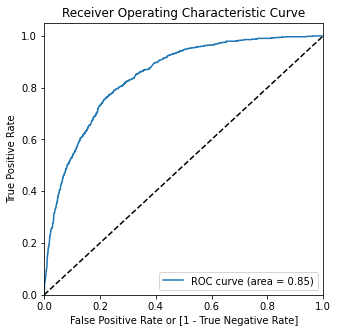

In [54]:
def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' %auc_score)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    plt.show()

draw_roc(y_train, y_train_pred_prob)

- At some cutoff scores, the model has high TPR and low FPR. The cutoff score at which TPR is maximum and FPR is minimum is the ideal cutoff for the problem at hand given that we want the model to predict positives correctly.
- I think, if we want the model to predict negatives correctly, the curve should be between TNR and FNR but let's see.
- We have to choose the cutoff based on the metric we want to maximize which depends on the business problem we are solving but let's see an optimal way of choosing cutoff.

#### Optimal Cutoff based on Sensitivity and Specificity

In [55]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

from sklearn.metrics import confusion_matrix

cutoff_df = pd.DataFrame( columns = ['prob','acc','sensi','speci'])

num = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for i in num:
    y_train_pred_temp = y_train_pred_prob.apply(lambda x : 1 if x > i else 0)
    cm1 = metrics.confusion_matrix(y_train, y_train_pred_temp)
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1]) / total1
    speci = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    sensi = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]
    
cutoff_df

,prob,acc,sensi,speci
0.0,0.0,0.259432,1.000000,0.000000
0.1,0.1,0.611765,0.949179,0.493563
0.2,0.2,0.717241,0.851446,0.670227
0.3,0.3,0.773022,0.763096,0.776500
0.4,0.4,0.792089,0.640344,0.845248
0.5,0.5,0.804462,0.534011,0.899206
0.6,0.6,0.803448,0.394840,0.946590
0.7,0.7,0.777282,0.191556,0.982471
0.8,0.8,0.750101,0.039875,0.998904
0.9,0.9,0.740568,0.000000,1.000000


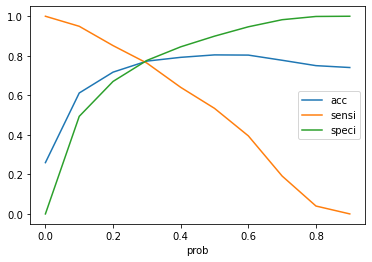

In [56]:
cutoff_df.plot(x="prob", y=["acc", "sensi", "speci"])
plt.show()

In [57]:
cutoff_df.prob[(cutoff_df.sensi - cutoff_df.speci < 0.1) & (cutoff_df.sensi - cutoff_df.speci > -0.1)]

0.3    0.3
Name: prob, dtype: float64

As we calculated and observed in the plot that at **0.3** cutoff, the sensitivity, specifity and accuracy are equal so it's the optimal cutoff

In [58]:
# At 0.3 cutoff

cutoff_df[cutoff_df.prob == 0.3]

,prob,acc,sensi,speci
0.3,0.3,0.773022,0.763096,0.7765


#### Precision and Recall

Precision is the ratio of correct yes predictions by total yes predictions. It tells us how precise we were in predicting yes. <br><br>
Precision = TP / (TP + FP)<br><br>
Recall is out of all yes's how many we were able to predict right. It is the same as sensitivity.<br><br>
Recall = TP / (TP + FN)<br><br>
There is an inverse relationship between the two because increasing precision means that we predict yes with high precision which means that we did not predict most of the yes, leading to low recall. Let's plot the graph between the two to see the relation.

In [62]:
# for 0.5 cutoff

p = confusion[1, 1] / float(confusion[1, 1] + confusion[0, 1])
r = confusion[1, 1] / float(confusion[1, 1] + confusion[1, 0])

print(f"At 0.5 cutoff:-\nPrecision = {round(p, 2)}\nRecall = {round(r, 2)}")

At 0.5 cutoff:-
Precision = 0.65
Recall = 0.53


In [65]:
# using sklearn methods for the same

from sklearn.metrics import precision_score, recall_score

print("Precision =", precision_score(y_true=y_train, y_pred=y_train_pred))

print("Recall =", recall_score(y_true=y_train, y_pred=y_train_pred))

Precision = 0.6498572787821123
Recall = 0.5340109460516028


#### Optimal Cutoff based on Precision and Recall

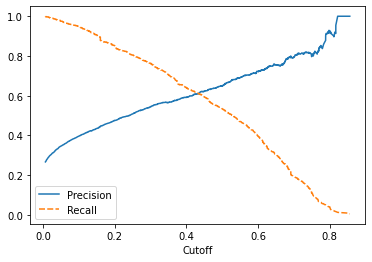

In [89]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_true=y_train, probas_pred=y_train_pred_prob)

pr_df = pd.DataFrame({"Cutoff":thresholds, "Precision":p[:-1], "Recall":r[:-1]})

pr_df.set_index("Cutoff", inplace=True)

sns.lineplot(data=pr_df)
plt.show()

In [90]:
pr_df[pr_df.Precision == pr_df.Recall]

,Precision,Recall
Cutoff,,
0.434064,0.610633,0.610633


- At **0.43** cutoff, precision and recall are same.
- We can take the call using precision and recall or using sensitivity and specificity, it depends of the business.
- As we know, sensitivity and recall is the same thing, what changes is precision/specificity
- precision   = TP / TP + FP 
- specificity = TN / TN + FP
- Depending on the use case, we may choose to evaluate the model based on either one of those.

#### Test set evaluation

Let's use the sensitivity and specificity view of things and decide the final cutoff to be 0.3

In [92]:
# let's make predictions on test set

X_test_sm = sm.add_constant(X_test[cols])

y_test_pred_prob = model4.predict(X_test_sm)

In [95]:
# deciding the labels on 0.3 cutoff

y_test_pred = y_test_pred_prob.apply(lambda x : 1 if x > 0.3 else 0)

# accuracy on test set

test_acc = metrics.accuracy_score(y_true=y_test, y_pred=y_test_pred)

print("Accuracy on test set =", round(test_acc, 2))

Accuracy on test set = 0.77


In [97]:
# confusion matrix on test set

confusion_2 = metrics.confusion_matrix(y_true=y_test, y_pred=y_test_pred)

TP = confusion_2[1, 1]
TN = confusion_2[0, 0]
FP = confusion_2[0, 1]
FN = confusion_2[1, 0]

# sensitivity on test set

test_sensi = TP / float(TP + FN)

# specificity on test set 

test_speci = TN / float(TN + FP)

print("Sensitivity on test set =", round(test_sensi, 2))
print("Specificity on test set =", round(test_speci, 2))

Sensitivity on test set = 0.74
Specificity on test set = 0.78


We can also use metrics.classification_report

In [103]:
print(metrics.classification_report(y_true=y_test, y_pred=y_test_pred, target_names=["non churn", "churn"]))

              precision    recall  f1-score   support

   non churn       0.88      0.78      0.83      1523
       churn       0.56      0.74      0.64       590

    accuracy                           0.77      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.80      0.77      0.78      2113



Just for comparison, let's use precision recall view and calculate labels based on 0.43 cutoff

In [108]:
y_test_pred_pr = y_test_pred_prob.apply(lambda x : 1 if x > 0.43 else 0)

print(metrics.classification_report(y_true=y_test, y_pred=y_test_pred_pr, target_names=["non churn", "churn"]))

              precision    recall  f1-score   support

   non churn       0.85      0.87      0.86      1523
       churn       0.64      0.61      0.62       590

    accuracy                           0.79      2113
   macro avg       0.74      0.74      0.74      2113
weighted avg       0.79      0.79      0.79      2113



The demonstration ends here. We made a model which predicts probability of a customer leaving our telecom company network and as a result, go to our competitor service providers. We wanted to predict which customers will churn so that discounts/offers can be given to retain them. We want to identify all the customers who are about to churn and reduce the wrong predictions as churn so that we don't waste resources by giving discounts to customers who anyways won't leave the network. So, our goal is to increase TPR(true positive rate/sensitivity) and reduce FPR(false positive rate/1 - specificity). We used sensitivity/specificity view of things to find the safe cutoff(where sensitivity and specificity are equal) and then evaluate the model on the test set based on that cutoff. For our problem, sensitivity and specificity is more important than precision and recall so we used cutoff of 0.3 to evaluate the model on test set and we were able to achieve sensitivity of 74% and specificity of 78%